# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.104392e+01     7.110111e+00
 * time: 0.005002021789550781
     1     2.733439e+01     5.879492e+00
 * time: 0.026255130767822266
     2     2.579994e+01     1.051816e+01
 * time: 0.050588130950927734
     3     2.213601e+01     1.059055e+01
 * time: 0.07488608360290527
     4     1.358403e+01     2.877935e+00
 * time: 0.1034841537475586
     5     1.106451e+01     1.737602e+00
 * time: 0.12726616859436035
     6     1.054973e+01     1.685017e+00
 * time: 0.14618897438049316
     7     1.018469e+01     1.011756e+00
 * time: 0.22232913970947266
     8     9.858459e+00     8.753180e-01
 * time: 0.24159598350524902
     9     9.662508e+00     7.468143e-01
 * time: 0.2605559825897217
    10     9.513168e+00     5.336913e-01
 * time: 0.2797520160675049
    11     9.395098e+00     5.715339e-01
 * time: 0.298429012298584
    12     9.317658e+00     6.303642e-01
 * time: 0.3121061325073242
    13     9.241084e+00     4.368589e-01
 * time: 0.

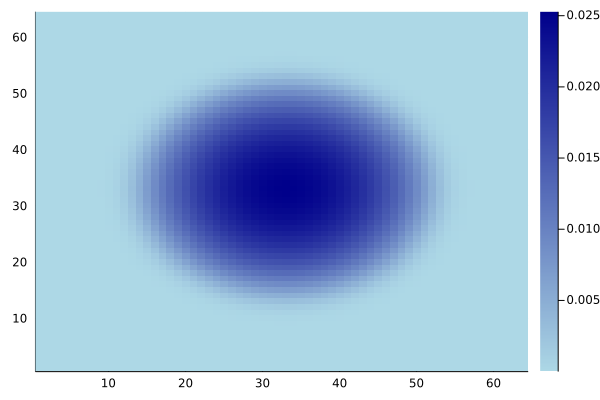

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)